<h2>기타 외곽선 관련 기능들</h2>

    boundingRect() 함수를 이용하면 객체를 감싸는 가장 작은 사각형을 찾을 수 있다.
    
![img](./img/contours/opencv_b1.PNG)

    boundingRect()로 구해지는 사각형은 아래 사진과 같다.
    
![img](./img/contours/bounding.png)
    
    minAreaRect() 함수를 사용하면 최소 크기의 회전된 사각형을 구할 수 있다.
![img](./img/contours/opencv_b2.PNG)

    혹은 가장 작은 원을 구하고 싶다면 minEnclosingCircle()함수를 사용하면 된다.
![img](./img/contours/opencv_b3.PNG)

    그 외에 곡선의 길이를 구해주는 arcLength()
![img](./img/contours/opencv_b4.PNG)

    해당 외곽선이 감싸고 있는 영역의 부피를 구해주는 contourArea()가 있다.
![img](./img/contours/opencv_b5.PNG)

    이렇게 외곽선을 구했다면 다양한 함수들로 활용이 가능하다.
    이 함수들 외에도 OpenCV에서는 많은 기능들을 지원하니 API문서를 찾아보는 것을 추천한다.

<h2>모양 판별</h2>

    앞서 얻은 외곽선 정보로 해당 객체가 어떤 모양인지 판별이 가능하다.
    더글라스-포이거 알고리즘을 사용하는 approxPolyDP()를 사용하면 외곽선 모양을 근사화 시켜준다.

![img](./img/contours/opencv_b6.PNG)

    이 기능을 이용하면 해당 객체가 어떤 도형인지 판별이 가능한데,
    근사화된 외곽선의 좌표가 3개로 이루어져 있으면 삼각형, 4개로 이루어져 있다면 사각형이라고 판별할 수 있다.
  

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def two_img_show(fir_img,fir_name,sec_img,sec_name):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(fir_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(fir_name)
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(sec_img, cv2.COLOR_BGR2RGB))
    ax2.set_title(sec_name)
    ax2.axis("off")

    plt.show()

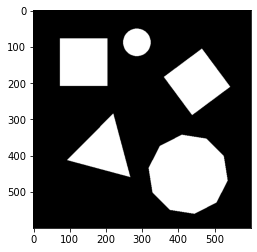

In [3]:
#마찬가지로 이진화된 이미지(혹은 grayScale) 이미지가 필요하다.

img_rect = cv2.imread("./img/contours/rect_test.png",cv2.IMREAD_GRAYSCALE)
origin_img_rect = cv2.imread("./img/contours/rect_test.png")

border , binary_rect = cv2.threshold(img_rect,150,255,cv2.THRESH_BINARY)

plt.imshow(binary_rect,cmap='gray')

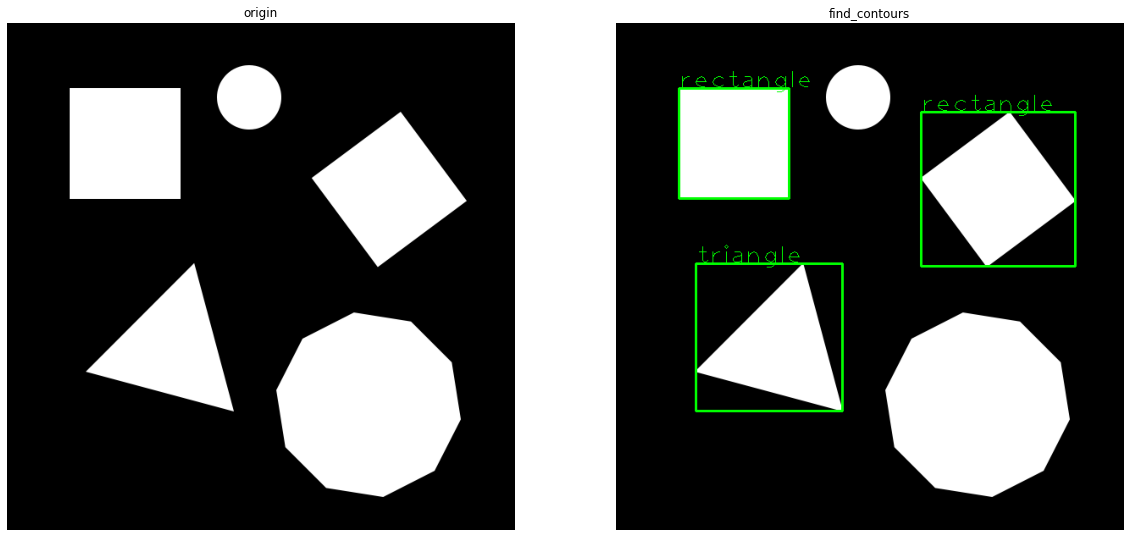

In [4]:
output_img_rect = origin_img_rect.copy()
#해당 이미지의 외곽선을 찾는다.

contours,_ = cv2.findContours(binary_rect,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

#찾은 외곽선들을 approxPolyDP()로 근사값으로 바꿔줌
for i in contours:
    points = cv2.approxPolyDP(i,cv2.arcLength(i,True)*0.02,True)
    num_point = len(points)
    
    if(num_point == 3):
        
        rc = cv2.boundingRect(i)
        #rc = (x,y,w,h)
        cv2.rectangle(output_img_rect,rc,(0,255,0),2)
        cv2.putText(output_img_rect,'triangle',(rc[0],rc[1]),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0))

    elif(num_point == 4):
        rc = cv2.boundingRect(i)
        cv2.rectangle(output_img_rect,rc,(0,255,0),2)
        cv2.putText(output_img_rect,'rectangle',(rc[0],rc[1]),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0))
    
two_img_show(origin_img_rect,'origin',output_img_rect,'find_contours')